# Second model D+3

Here is a research notebook used for tests.

### Import librairies:

In [9]:
from keras import optimizers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
import datetime

Install the jupyter-tensorboard extension if needed:

https://github.com/lspvic/jupyter_tensorboard

In [10]:
#%pip install jupyter-tensorboard

Load Tensorboard:

In [11]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


### Parameters:

In [12]:
#model
LOAD_MODEL = False 
MODEL_TO_LOAD_NAME = 'model.h5'
PATH_TO_MODELS = "Models/"

#dataset
CSV_PATH = "Datasets/"
CSV_NAME = "completeDataset/completeDataset.csv"
features_considered = ['IQ','pressure','wind_direction','wind_force','humidity','temperature']

### Import dataset:

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

                            IQ  pressure  wind_direction  wind_force  \
date                                                                   
2020-02-29 09:00:00+00:00  0.4  0.941600             180    0.547368   
2020-02-29 12:00:00+00:00  0.4  0.942367             250    0.615789   
2020-02-29 15:00:00+00:00  0.4  0.945531             240    0.568421   
2020-02-29 18:00:00+00:00  0.4  0.947641             230    0.394737   
2020-02-29 21:00:00+00:00  0.4  0.948312             210    0.452632   

                           humidity  temperature  
date                                              
2020-02-29 09:00:00+00:00      0.74     0.248792  
2020-02-29 12:00:00+00:00      0.83     0.178744  
2020-02-29 15:00:00+00:00      0.57     0.222222  
2020-02-29 18:00:00+00:00      0.59     0.185990  
2020-02-29 21:00:00+00:00      0.80     0.113527  


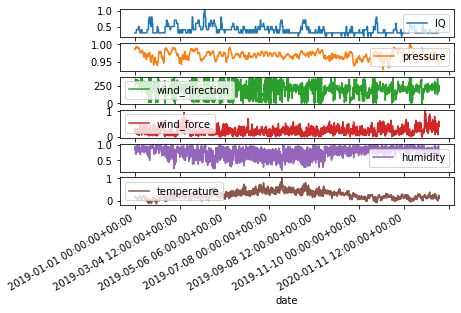

,IQ,pressure,wind_force,humidity,temperature,0,10,20,30,40,...,270,280,290,300,310,320,330,340,350,360
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00+00:00,0.3,0.986479,0.152632,0.89,0.173913,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-01-01 03:00:00+00:00,0.3,0.985807,0.152632,0.85,0.173913,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2019-01-01 06:00:00+00:00,0.3,0.985040,0.152632,0.84,0.171498,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-01-01 09:00:00+00:00,0.3,0.985136,0.189474,0.84,0.178744,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-01-01 12:00:00+00:00,0.3,0.984273,0.300000,0.85,0.207729,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-29 09:00:00+00:00,0.4,0.941600,0.547368,0.74,0.248792,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-02-29 12:00:00+00:00,0.4,0.942367,0.615789,0.83,0.178744,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-02-29 15:00:00+00:00,0.4,0.945531,0.568421,0.57,0.222222,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df = pd.read_csv(CSV_PATH+CSV_NAME, header=0, delimiter=';')

features = df[features_considered]
features.index = df['date']

dataset_test = features.values

def higher_value(dataset_test,i):
    return[row[i] for row in dataset_test]

max_pressure = max(higher_value(dataset_test,1))
max_wind_direction = max(higher_value(dataset_test,2))
max_wind_force = max(higher_value(dataset_test,3))
max_temperature = max(higher_value(dataset_test, 5))

#normalize
features['IQ'] = features['IQ'].apply(lambda x: x/10)
features['pressure'] = features['pressure'].apply(lambda x: x/max_pressure)
features['wind_force'] = features['wind_force'].apply(lambda x: x/max_wind_force)
features['humidity'] = features['humidity'].apply(lambda x: x/100)
features['temperature'] = features['temperature'].apply(lambda x: (x-273.15)/(max_temperature-273.15)) 

print(features.tail())
features.plot(subplots=True)
plt.show()

#wind direction to categorical
features = pd.concat([features, pd.get_dummies(features['wind_direction'])], axis=1)
features.drop(columns=['wind_direction'])

Check that the length of the dataset is a multiple of 8:

### Create training data

In [15]:
RANDOM_SHUFFLE_SEED = 0

def createTraining(dataset,nb_measures,nb_features_x,nb_features_y):
    """
    shape the trainning dataset
    """
    chunks = [dataset[x*8:x*8+nb_measures] for x in range(0, int(len(dataset)/8))] #as there is 8 measures each day
    
    # we check that all the chuncks have the same length, as the nb_measures could be longuer than a day
    elementsToRemove = []
    for chunk in chunks: 
        if chunk.shape!=chunks[0].shape:
            elementsToRemove.append(chunk)    
    for e in elementsToRemove:
        chunks.remove(e)        
    chunks = np.array(chunks)  
    
    x_train = chunks[:,:,0:nb_features_x]
    y_train = chunks[:,0,nb_features_y:]
    x_train,y_train = shuffle(x_train,y_train, random_state=RANDOM_SHUFFLE_SEED)
    return(x_train, y_train)

In [16]:
nb_prev_measures_for_predict = 16

x_train,y_train = createTraining(dataset,nb_prev_measures_for_predict,len(features_considered)-3,3)

print("x_train ",x_train.shape)
print("y_train ",y_train.shape)

x_train  (423, 16, 3)
y_train  (423, 40)


c:\program files\python37\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  from ipykernel import kernelapp as app


### Load the model or create it:

In [17]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, GRU

In [20]:
OPTIMIZER = keras.optimizers.RMSprop(learning_rate=0.005)
LOSS = 'mae'

if LOAD_MODEL: 
    model = keras.models.load_model(PATH_TO_MODELS + MODEL_TO_LOAD_NAME)
    model.compile(OPTIMIZER, loss=LOSS)
else:
    # Model
    input_shape = (x_train.shape[-2],x_train.shape[-1])

    model = Sequential()
    model.add(LSTM(512, input_shape=input_shape,name='LSTM_layer'))
    model.add(Dense(40,name="Dense_layer"))
    model.compile(optimizer=OPTIMIZER, loss=LOSS)
    model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
LSTM_layer (LSTM)            (None, 512)               1056768   
_________________________________________________________________
Dense_layer (Dense)          (None, 40)                20520     
Total params: 1,077,288
Trainable params: 1,077,288
Non-trainable params: 0
_________________________________________________________________


### Train

In [21]:
EPOCHS = 40
kfoldsize = 5

tensor_board = tf.keras.callbacks.TensorBoard('.\logs\\'+str(datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")))

for train_index,test_index in KFold(kfoldsize).split(x_train):
    x,x_val = x_train[train_index],x_train[test_index]
    y,y_val = y_train[train_index],y_train[test_index]
    
    model.fit(x=x, y=y, validation_data=(x_val,y_val),epochs=EPOCHS)

Train on 338 samples, validate on 85 samples
Epoch 1/40
338/338 [==============================] - 2s 5ms/step - loss: 0.5955 - val_loss: 0.2350
Epoch 2/40
338/338 [==============================] - 1s 3ms/step - loss: 0.2016 - val_loss: 0.1875
Epoch 3/40
338/338 [==============================] - 1s 4ms/step - loss: 0.1658 - val_loss: 0.1422
Epoch 4/40
338/338 [==============================] - 1s 4ms/step - loss: 0.1421 - val_loss: 0.1739
Epoch 5/40
338/338 [==============================] - 1s 3ms/step - loss: 0.1352 - val_loss: 0.1421
Epoch 6/40
338/338 [==============================] - 1s 4ms/step - loss: 0.1223 - val_loss: 0.1264
Epoch 7/40
338/338 [==============================] - 1s 4ms/step - loss: 0.1328 - val_loss: 0.1342
Epoch 8/40
338/338 [==============================] - 1s 4ms/step - loss: 0.1146 - val_loss: 0.1155
Epoch 9/40
338/338 [==============================] - 1s 4ms/step - loss: 0.1070 - val_loss: 0.1036
Epoch 10/40
338/338 [==============================] - 

338/338 [==============================] - 1s 4ms/step - loss: 0.0428 - val_loss: 0.0396
Epoch 2/40
224/338 [==================>...........] - ETA: 0s - loss: 0.0407

KeyboardInterrupt: 

### See the training in tensorboard

In [ ]:
#%tensorboard --logdir=./logs

### See the results

In [ ]:
def calc_accuracy_3days(y_pred,y_true):
    """
    calculate the accurracy of the prediction according to the true value for each day [D+1, D+2, D+3]
    """
    accuracy = [0,0,0]
    for pred,true in zip (y_pred,y_true):
        for plusDay in range(3):
            if true[plusDay] == round(pred[plusDay]):
                accuracy[plusDay]+=1
    return(np.array(accuracy)/len(y_true)*100)
    
def mean_error_3days(y_pred,y_true):
    """
    calculate the mean error between the prediction and the true value for each day [D+1, D+2, D+3]
    """
    error = [0,0,0]
    for pred,true in zip (y_pred,y_true):
        for plusDay in range(3):
            error[plusDay] += abs(true[plusDay] - pred[plusDay])
    return(np.array(error)/len(y_true))

Calculate the accuracy and mean error for each day [D+1, D+2, D+3]:

In [ ]:
y_pred = model.predict(x_train)
accuracy = calc_accuracy_3days(y_pred,y_train)
meanError = mean_error_3days(y_pred,y_train)

Show the results in graphs:

In [ ]:
print('Prediction of the air index quality (on training data)')
for plusDay in range(3):
    #plot predict    
    plt.plot(y_train[:,plusDay], label='Real')
    plt.plot(y_pred[:,plusDay], label='Prediction')
    plt.xlabel('Days', fontsize=18)
    plt.ylabel('D+'+str(plusDay+1), fontsize=16)
    plt.legend()
    plt.show()

    print("Accuracy with training data:",round(accuracy[plusDay],2),"%")
    print("Mean error with training data:",round(meanError[plusDay],2))
